# JPX Tokyo Stock Exchange Prediction - Exploratory Data Analysis

This notebook contains the exploratory data analysis for the JPX Tokyo Stock Exchange Prediction challenge.

## Table of Contents
1. [Setup and Data Loading](#setup)
2. [Basic Data Overview](#overview)
3. [Target Analysis](#target)
4. [Stock Price Analysis](#price)
5. [Sector Analysis](#sector)
6. [Financial Metrics Analysis](#financials)
7. [Time Series Patterns](#time)
8. [Missing Data Analysis](#missing)
9. [Feature Correlations](#correlations)
10. [Key Findings](#findings)

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Display settings
# pd.set_option('display.max_columns', None)
# warnings.filterwarnings('ignore')
# plt.style.use('seaborn')
# %matplotlib inline

## 1. Setup and Data Loading <a name="setup"></a>

In [3]:
# Load the data files
def load_data():
    stock_prices = pd.read_csv('../data/stock_prices.csv')
    stock_list = pd.read_csv('../data/stock_list.csv')
    financials = pd.read_csv('../data/financials.csv')
    
    # Convert date columns
    stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])
    
    return stock_prices, stock_list, financials

# Load the data
try:
    stock_prices, stock_list, financials = load_data()
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")

Data loaded successfully!


## 2. Basic Data Overview <a name="overview"></a>

In [4]:
def display_basic_info(df, name):
    print(f"\n=== {name} Dataset ===")
    print(f"Shape: {df.shape}")
    print("\nFirst few rows:")
    display(df.head())
    print("\nData Info:")
    display(df.info())
    print("\nMissing Values:")
    display(df.isnull().sum())

# Display basic information for each dataset
for df, name in zip([stock_prices, stock_list, financials], 
                   ['Stock Prices', 'Stock List', 'Financials']):
    display_basic_info(df, name)


=== Stock Prices Dataset ===
Shape: (269881, 12)

First few rows:


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False,-0.008993
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False,-0.009963
3,20211206_1375,2021-12-06,1375,1230.0,1239.0,1224.0,1224.0,81100,1.0,NaN,False,-0.015032
4,20211206_1376,2021-12-06,1376,1339.0,1372.0,1339.0,1351.0,6200,1.0,NaN,False,0.002867



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269881 entries, 0 to 269880
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   RowId             269881 non-null  object        
 1   Date              269881 non-null  datetime64[ns]
 2   SecuritiesCode    269881 non-null  int64         
 3   Open              269063 non-null  float64       
 4   High              269063 non-null  float64       
 5   Low               269063 non-null  float64       
 6   Close             269063 non-null  float64       
 7   Volume            269881 non-null  int64         
 8   AdjustmentFactor  269881 non-null  float64       
 9   ExpectedDividend  2011 non-null    float64       
 10  SupervisionFlag   269881 non-null  bool          
 11  Target            269873 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 22.9+ MB


None


Missing Values:


RowId                    0
Date                     0
SecuritiesCode           0
Open                   818
High                   818
Low                    818
Close                  818
Volume                   0
AdjustmentFactor         0
ExpectedDividend    267870
SupervisionFlag          0
Target                   8
dtype: int64


=== Stock List Dataset ===
Shape: (4417, 16)

First few rows:


,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SecuritiesCode          4417 non-null   int64  
 1   EffectiveDate           4417 non-null   int64  
 2   Name                    4417 non-null   object 
 3   Section/Products        4417 non-null   object 
 4   NewMarketSegment        3772 non-null   object 
 5   33SectorCode            4417 non-null   object 
 6   33SectorName            4417 non-null   object 
 7   17SectorCode            4417 non-null   object 
 8   17SectorName            4417 non-null   object 
 9   NewIndexSeriesSizeCode  4417 non-null   object 
 10  NewIndexSeriesSize      4417 non-null   object 
 11  TradeDate               4121 non-null   float64
 12  Close                   4121 non-null   float64
 13  IssuedShares            4121 non-null   float64
 14  MarketCapitalization    4121

None


Missing Values:


SecuritiesCode              0
EffectiveDate               0
Name                        0
Section/Products            0
NewMarketSegment          645
33SectorCode                0
33SectorName                0
17SectorCode                0
17SectorName                0
NewIndexSeriesSizeCode      0
NewIndexSeriesSize          0
TradeDate                 296
Close                     296
IssuedShares              296
MarketCapitalization      296
Universe0                   0
dtype: int64


=== Financials Dataset ===
Shape: (9794, 45)

First few rows:


,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,CurrentFiscalYearStartDate,CurrentFiscalYearEndDate,NetSales,OperatingProfit,OrdinaryProfit,Profit,EarningsPerShare,TotalAssets,Equity,EquityToAssetRatio,BookValuePerShare,ResultDividendPerShare1stQuarter,ResultDividendPerShare2ndQuarter,ResultDividendPerShare3rdQuarter,ResultDividendPerShareFiscalYearEnd,ResultDividendPerShareAnnual,ForecastDividendPerShare1stQuarter,ForecastDividendPerShare2ndQuarter,ForecastDividendPerShare3rdQuarter,ForecastDividendPerShareFiscalYearEnd,ForecastDividendPerShareAnnual,ForecastNetSales,ForecastOperatingProfit,ForecastOrdinaryProfit,ForecastProfit,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.021121e+13,20211206_1873,2021-12-06,1873.0,2021-12-06,15:00:00,1.638770e+09,ForecastRevision,2021-10-31,FY,2020-11-01,2021-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,－,－,10.0,13.0,37140000000,2700000000,2650000000,1600000000,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.021121e+13,20211206_4813,2021-12-06,4813.0,2021-12-06,15:00:00,1.638770e+09,3QFinancialStatements_Consolidated_JP,2021-10-31,3Q,2021-02-01,2022-01-31,5798000000,-2819000000,-2305000000,-2380000000,-60.89,2.779400e+10,2.579500e+10,0.926,NaN,－,0.0,－,NaN,NaN,NaN,NaN,NaN,－,－,9000000000,-3400000000,-2900000000,-3050000000,-77.98,NaN,True,False,False,False,False,39633000.0,466421,39095375.0
2,2.021112e+13,20211206_4824,2021-12-06,4824.0,2021-12-06,08:30:00,1.638747e+09,1QFinancialStatements_Consolidated_JP,2021-10-31,1Q,2021-08-01,2022-07-31,237000000,33000000,47000000,41000000,4.27,4.837000e+09,3.838000e+09,0.789,391.71,－,NaN,NaN,NaN,NaN,NaN,0.0,－,1.0,1.0,867000000,28000000,52000000,36000000,3.69,NaN,False,False,False,False,False,9766800.0,23345,9743455.0
3,2.021112e+13,20211206_6656,2021-12-06,6656.0,2021-12-06,15:00:00,1.638770e+09,2QFinancialStatements_NonConsolidated_JP,2021-10-31,2Q,2021-05-01,2022-04-30,1039000000,26000000,18000000,11000000,3.16,2.955000e+09,9.290000e+08,0.261,203.69,－,0.0,NaN,NaN,NaN,NaN,NaN,－,3.0,3.0,2300000000,80000000,200000000,170000000,44.85,False,NaN,True,False,False,False,3790400.0,156,3790170.0
4,2.021120e+13,20211206_9824,2021-12-06,9824.0,2021-12-06,11:00:00,1.638756e+09,ForecastRevision,2021-10-31,FY,2020-11-01,2021-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86900000000,4740000000,4250000000,3580000000,337.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 45 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   DisclosureNumber                                                              9794 non-null   float64
 1   DateCode                                                                      9794 non-null   object 
 2   Date                                                                          9794 non-null   object 
 3   SecuritiesCode                                                                9794 non-null   float64
 4   DisclosedDate                                                                 9794 non-null   object 
 5   DisclosedTime                                                                 9794 non-null   object 
 6   DisclosedUnixTime   

None


Missing Values:


DisclosureNumber                                                                   0
DateCode                                                                           0
Date                                                                               0
SecuritiesCode                                                                     0
DisclosedDate                                                                      0
DisclosedTime                                                                      0
DisclosedUnixTime                                                                  0
TypeOfDocument                                                                     0
CurrentPeriodEndDate                                                               0
TypeOfCurrentPeriod                                                                0
CurrentFiscalYearStartDate                                                         0
CurrentFiscalYearEndDate                                         

## 3. Target Analysis <a name="target"></a>

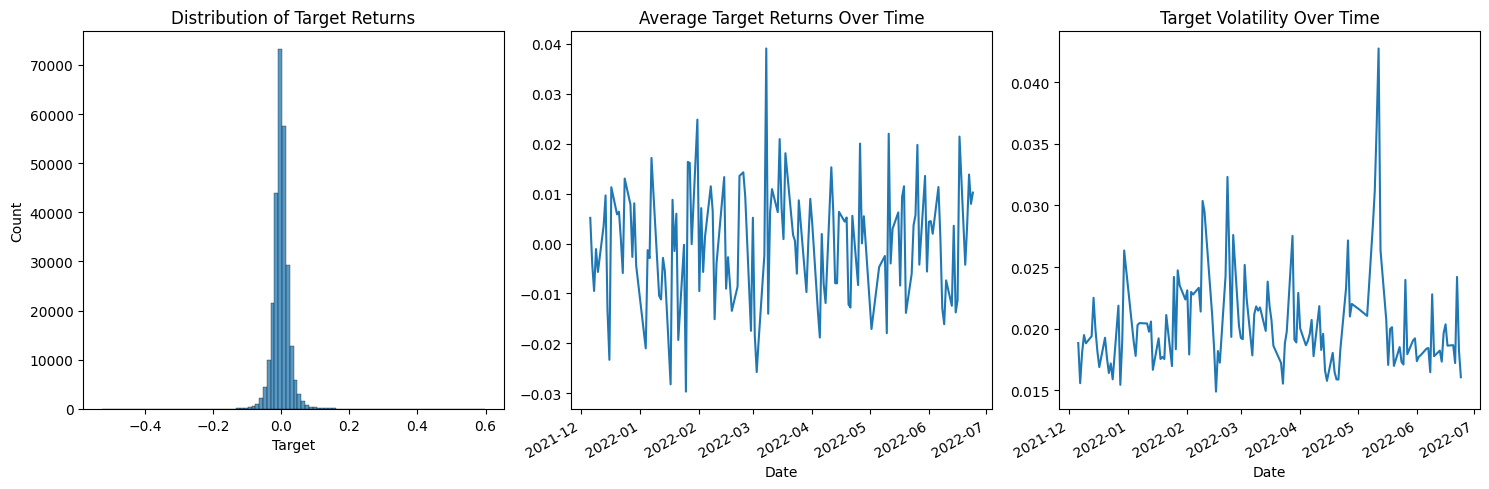

In [5]:
def analyze_target(df):
    plt.figure(figsize=(15, 5))
    
    # Distribution of target
    plt.subplot(1, 3, 1)
    sns.histplot(df['Target'].dropna(), bins=100)
    plt.title('Distribution of Target Returns')
    
    # Target over time
    plt.subplot(1, 3, 2)
    df.groupby('Date')['Target'].mean().plot()
    plt.title('Average Target Returns Over Time')
    
    # Target volatility
    plt.subplot(1, 3, 3)
    df.groupby('Date')['Target'].std().plot()
    plt.title('Target Volatility Over Time')
    
    plt.tight_layout()
    plt.show()

analyze_target(stock_prices)

## 4. Stock Price Analysis <a name="price"></a>

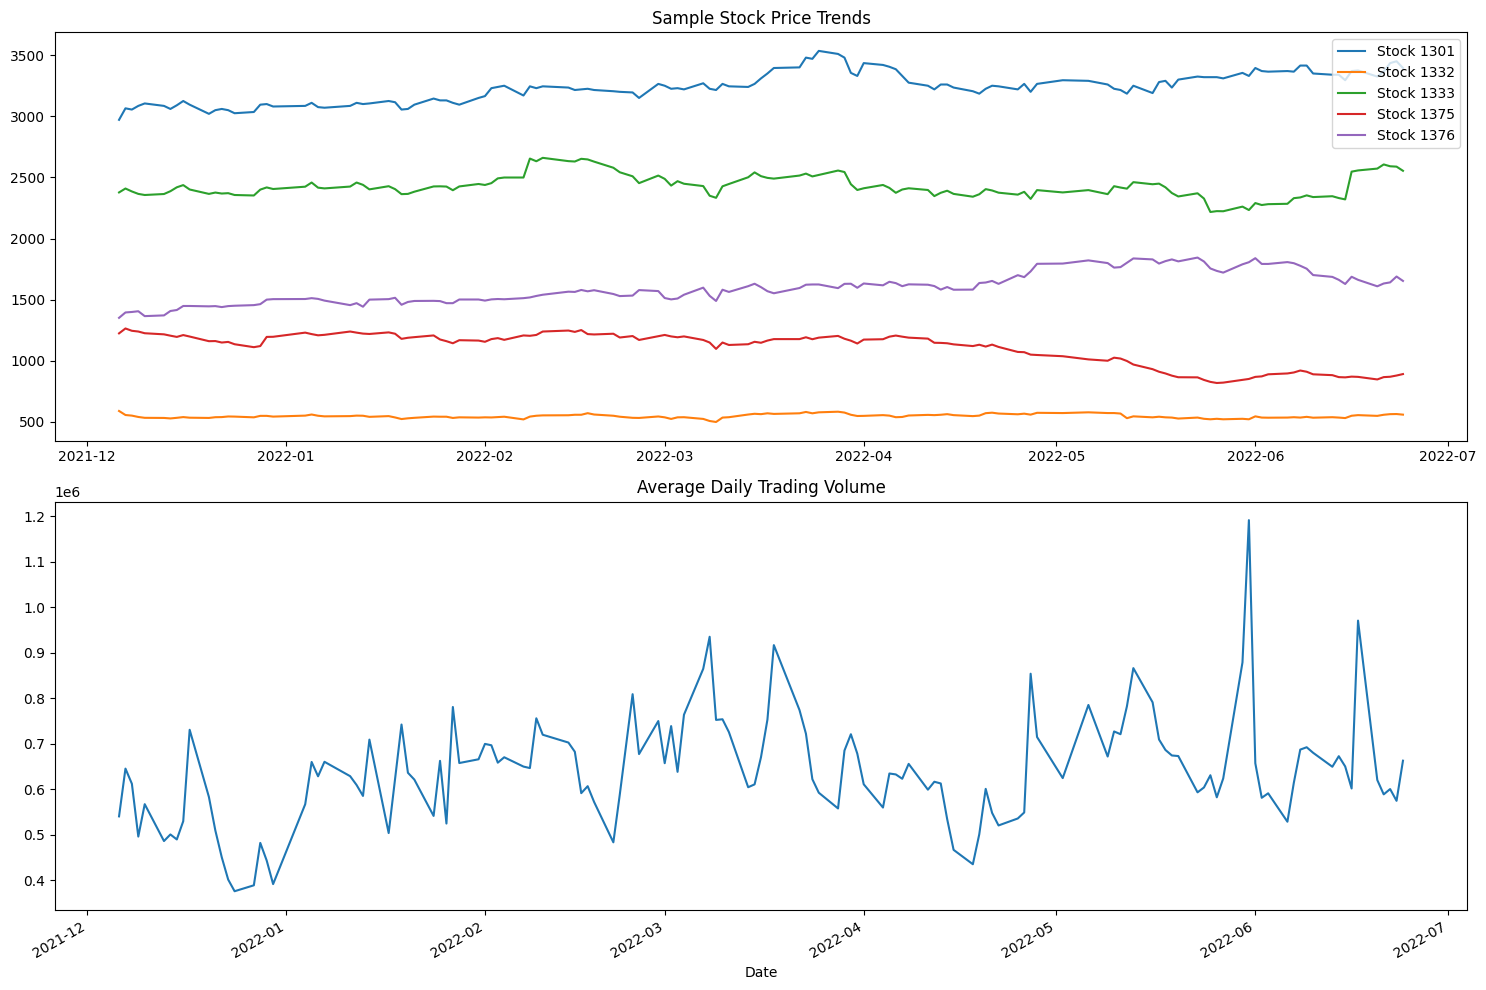

In [6]:
def analyze_prices(df):
    # Sample some random stocks
    sample_stocks = df['SecuritiesCode'].unique()[:5]
    
    plt.figure(figsize=(15, 10))
    
    # Price trends
    plt.subplot(2, 1, 1)
    for stock in sample_stocks:
        stock_data = df[df['SecuritiesCode'] == stock]
        plt.plot(stock_data['Date'], stock_data['Close'], label=f'Stock {stock}')
    plt.title('Sample Stock Price Trends')
    plt.legend()
    
    # Volume analysis
    plt.subplot(2, 1, 2)
    df.groupby('Date')['Volume'].mean().plot()
    plt.title('Average Daily Trading Volume')
    
    plt.tight_layout()
    plt.show()

analyze_prices(stock_prices)

## 5. Sector Analysis <a name="sector"></a>

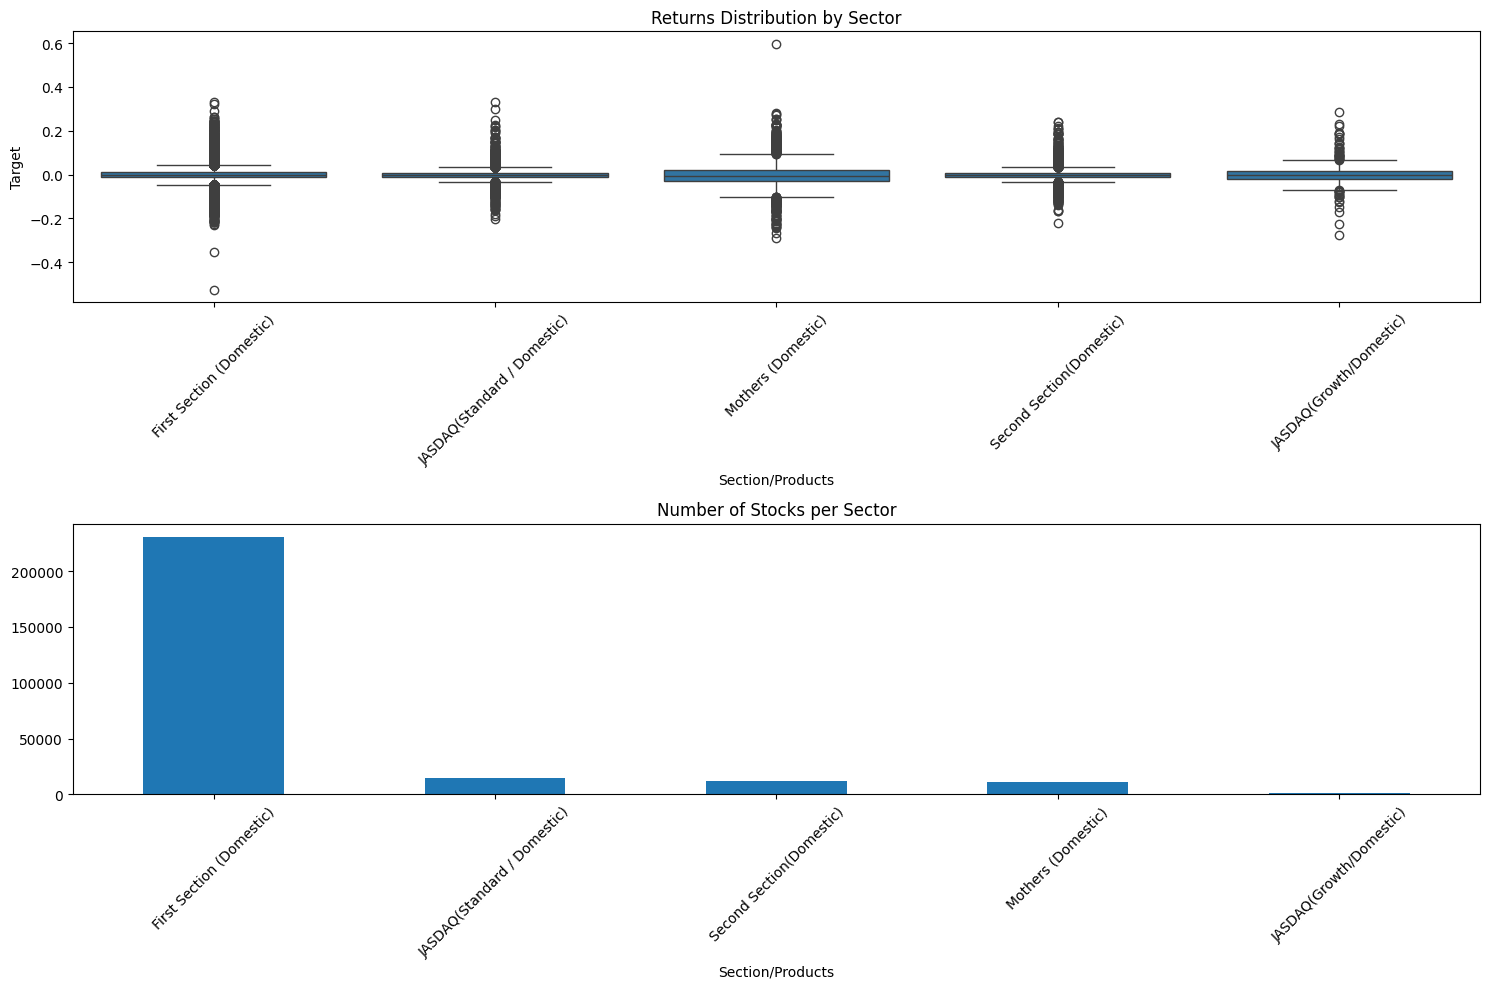

In [7]:
def analyze_sectors(prices_df, list_df):
    # Merge stock prices with sector information
    df = prices_df.merge(list_df[['SecuritiesCode', 'Section/Products']], 
                        on='SecuritiesCode', how='left')
    
    plt.figure(figsize=(15, 10))
    
    # Returns by sector
    plt.subplot(2, 1, 1)
    sns.boxplot(data=df, x='Section/Products', y='Target')
    plt.xticks(rotation=45)
    plt.title('Returns Distribution by Sector')
    
    # Sector composition
    plt.subplot(2, 1, 2)
    df['Section/Products'].value_counts().plot(kind='bar')
    plt.title('Number of Stocks per Sector')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

analyze_sectors(stock_prices, stock_list)

## 6. Financial Metrics Analysis <a name="financials"></a>

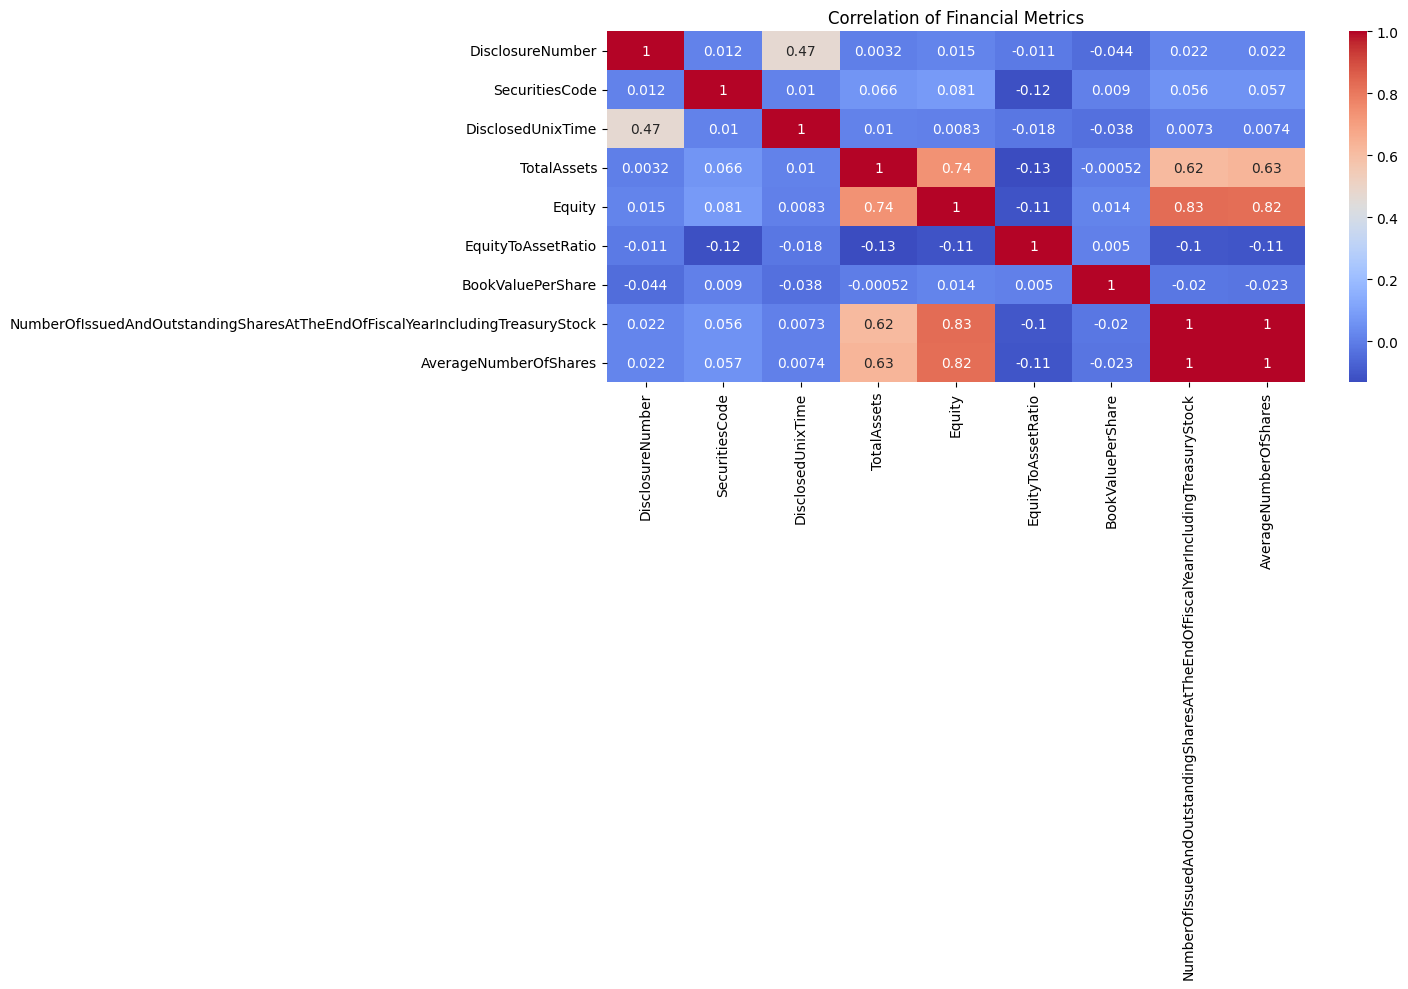

In [8]:
def analyze_financials(fin_df):
    # Select numerical columns
    num_cols = fin_df.select_dtypes(include=[np.number]).columns
    
    plt.figure(figsize=(15, 10))
    
    # Correlation heatmap
    sns.heatmap(fin_df[num_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation of Financial Metrics')
    plt.tight_layout()
    plt.show()

analyze_financials(financials)

## 7. Time Series Patterns <a name="time"></a>

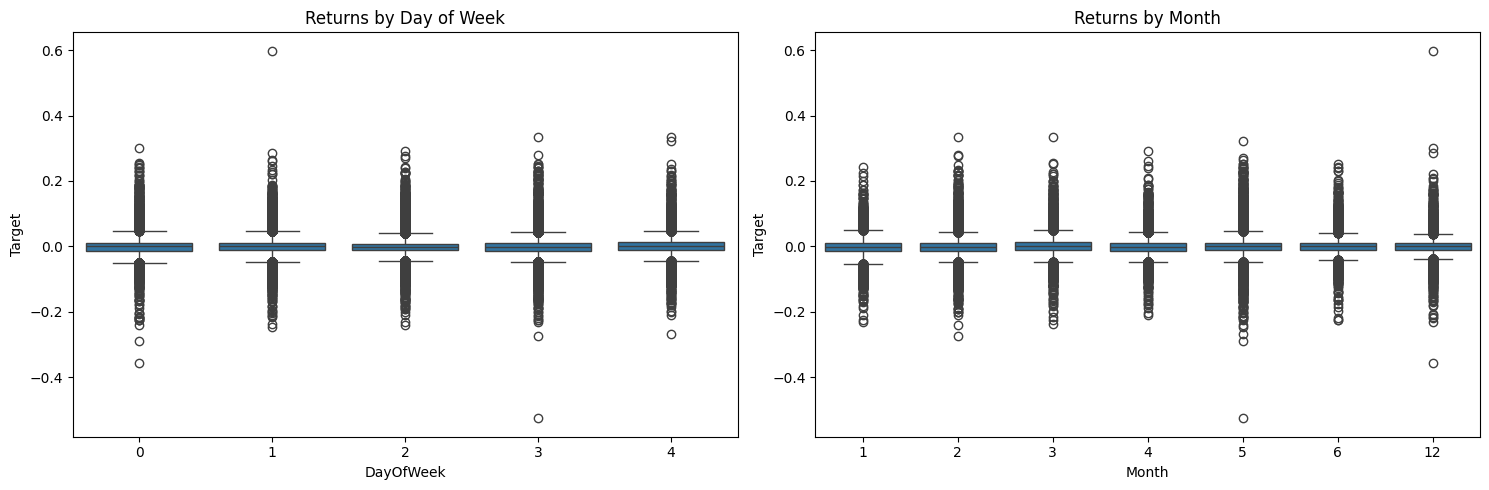

In [9]:
def analyze_time_patterns(df):
    # Add time-based features
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month
    
    plt.figure(figsize=(15, 5))
    
    # Returns by day of week
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='DayOfWeek', y='Target')
    plt.title('Returns by Day of Week')
    
    # Returns by month
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='Month', y='Target')
    plt.title('Returns by Month')
    
    plt.tight_layout()
    plt.show()

analyze_time_patterns(stock_prices)

## 8. Missing Data Analysis <a name="missing"></a>


Missing Data Analysis for Stock Prices


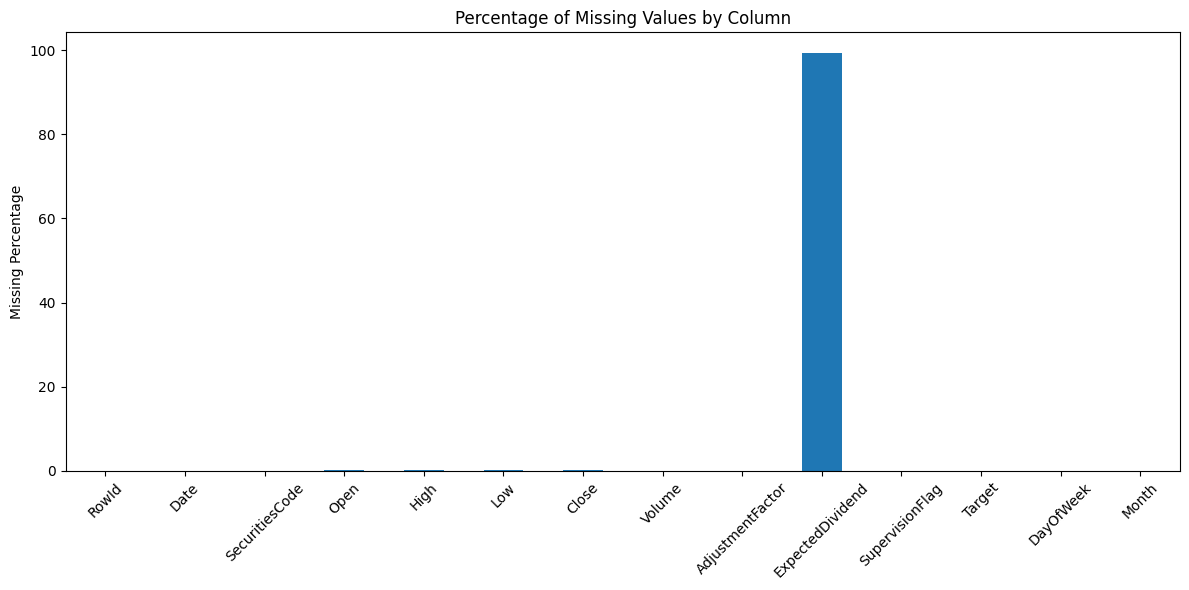


Missing Data Analysis for Financials


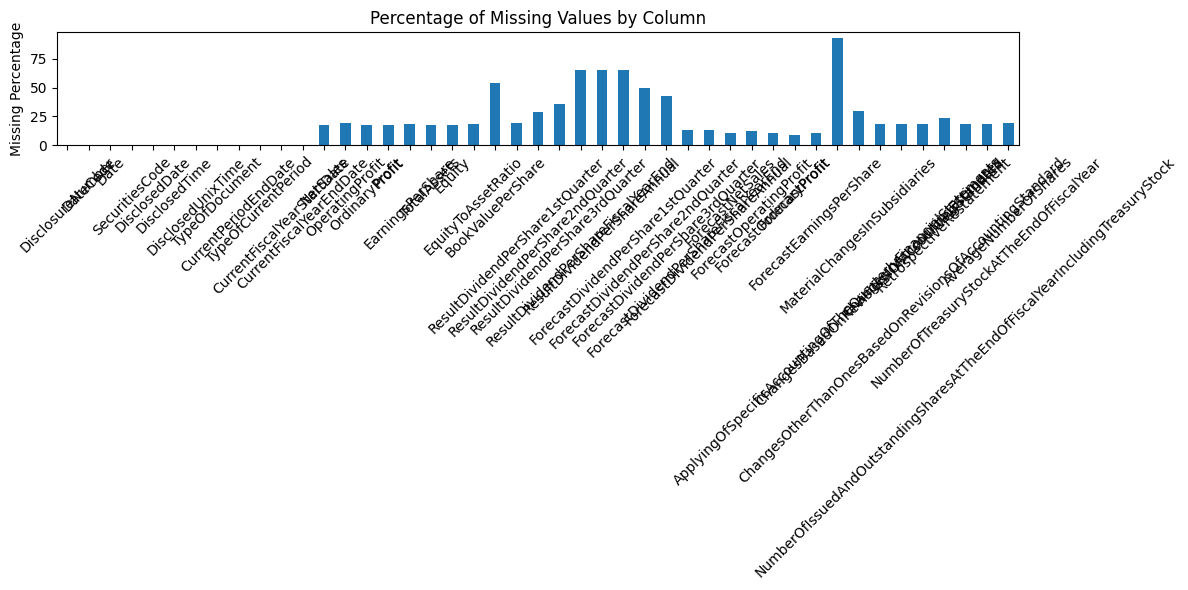

In [10]:
def analyze_missing_data(df):
    # Calculate missing percentages
    missing_pct = (df.isnull().sum() / len(df)) * 100
    
    plt.figure(figsize=(12, 6))
    missing_pct.plot(kind='bar')
    plt.title('Percentage of Missing Values by Column')
    plt.ylabel('Missing Percentage')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

for df, name in zip([stock_prices, financials], ['Stock Prices', 'Financials']):
    print(f"\nMissing Data Analysis for {name}")
    analyze_missing_data(df)

## 9. Feature Correlations <a name="correlations"></a>

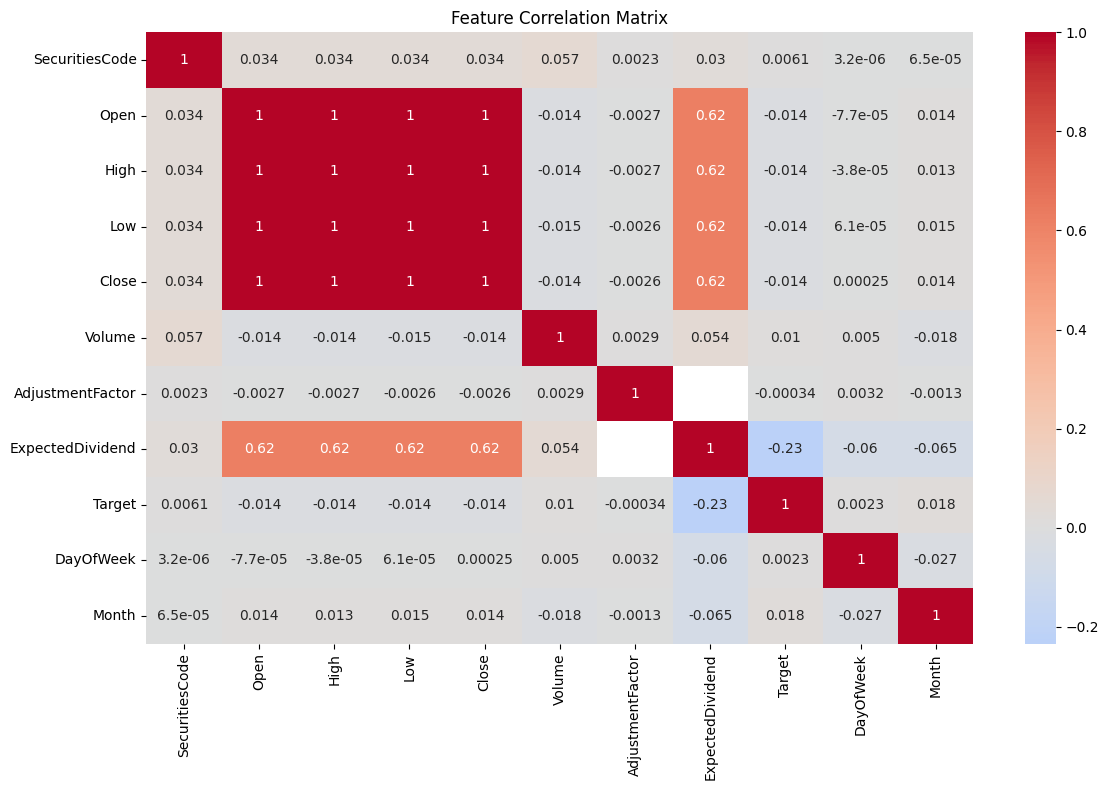

In [11]:
def analyze_correlations(df):
    # Select numerical columns
    num_cols = df.select_dtypes(include=[np.number]).columns
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()

analyze_correlations(stock_prices)

## 10. Key Findings <a name="findings"></a>

Summary of key findings from the EDA:

1. **Target Distribution**:
   - The distribution of target returns is centered around zero, with a slight skew and heavy tails, indicating the presence of outliers and occasional large price movements.
   - Volatility in target returns varies over time, with certain periods showing increased risk.

2. **Stock Price Patterns**:
   - Stock prices show clear long-term trends and seasonality, with some stocks exhibiting more pronounced volatility than others.
   - Trading volume also varies significantly across time, with spikes often corresponding to market events or increased activity.

3. **Sector Analysis**:
   - There are notable differences in return distributions across sectors, with some sectors consistently outperforming or underperforming others.
   - The number of stocks is unevenly distributed among sectors, which may impact model training and evaluation.

4. **Missing Data**:
   - Missing values are present in both stock price and financial datasets, with some financial features having substantial missingness.
   - Most price-related columns are largely complete, but certain financial metrics require imputation or careful handling.

5. **Time Series Patterns**:
   - Returns exhibit day-of-week and monthly effects, with some days and months showing higher average returns or volatility.
   - These temporal patterns suggest potential for time-based feature engineering.

6. **Feature Correlations**:
   - Strong correlations exist among price-based features (e.g., open, close, high, low), and between some financial metrics.
   - The target variable shows only modest correlation with individual features, highlighting the challenge of prediction and the need for complex models.

### Next Steps:
1. Feature engineering based on identified patterns
2. Missing data handling strategy
3. Model selection considerations